In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook

***
# Notebook: Data as geometry
*Introduction to intelligent systems - the toolbox* 

** Objectives **: The objectives of this notebook is to understand (i) ..., (ii) ... and (iii) ...

***

## Introduction
We will in this notebook investigate how the following simple neural network works:

<img src="network.png",width=500,height=500>

## Data
We will adjust our network such that it can distingues between two classes of 2D points

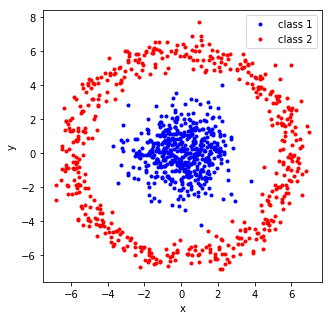

In [2]:
# Lets generate 500 points from two classes
N = 500
t = np.linspace(0, 360, N)
x1 = np.random.normal(size=N, scale=1.3)
y1 = np.random.normal(size=N, scale=1.3)
x2 = 6*np.cos(t) + np.random.normal(size=N, scale=0.5)
y2 = 6*np.sin(t) + np.random.normal(size=N, scale=0.5)
X = np.vstack((np.array([x1,y1]).T, np.array([x2, y2]).T))
Y = np.concatenate([np.ones((N,)), np.zeros((N,))])
fig = plt.figure(figsize=(5, 5))
ax = fig.gca()
ax.plot(x1, y1, 'b.', label='class 1')
ax.plot(x2, y2, 'r.', label='class 2')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

### Exercise
* Can you explain how the 2D points were generated?
* Adjust the weights such that ...

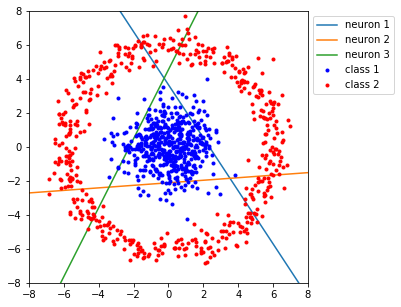

In [3]:
# Change w1, w2, w3
w1 = np.array([0.64, 0.41])
w2 = np.array([0.053, -0.71])
w3 = np.array([-0.67, 0.33])

# Plot the decision boundaries
bias = -1.5
xx=np.linspace(-8, 8, 10)
l1_0=-(w1[0]*xx+bias)/w1[1]
l2_0=-(w2[0]*xx+bias)/w2[1]
l3_0=-(w3[0]*xx+bias)/w3[1]
fig = plt.figure(figsize=(5, 5)); ax=fig.gca()
ax.plot(xx, l1_0, label='neuron 1')
ax.plot(xx, l2_0, label='neuron 2')
ax.plot(xx, l3_0, label='neuron 3')
ax.plot(x1, y1, 'b.', label='class 1')
ax.plot(x2, y2, 'r.', label='class 2')
ax.legend(bbox_to_anchor=(1, 1))
ax.axis([-8, 8, -8, 8])
plt.show()

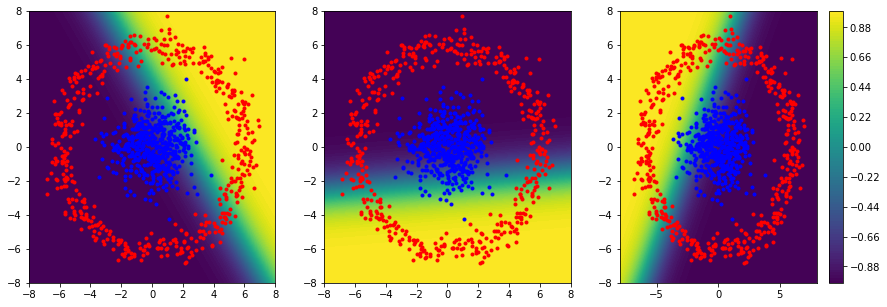

In [4]:
n = 100
x, y = np.meshgrid(np.linspace(-8, 8, n), np.linspace(-8, 8, n))
p = np.array([x.flatten(), y.flatten()])

l1 = np.tanh(w1.T.dot(p) + bias).reshape(n, n)
l2 = np.tanh(w2.T.dot(p) + bias).reshape(n, n)
l3 = np.tanh(w3.T.dot(p) + bias).reshape(n, n)
l = np.array([l1, l2, l3])

fig, ax = plt.subplots(1,3, figsize=(15, 5))
for i in range(3):
    ax[i].plot(x1, y1, 'b.', label='class 1')
    ax[i].plot(x2, y2, 'r.', label='class 2')
    cf = ax[i].contourf(x, y, l[i], 100)
fig.colorbar(cf, ax=ax[2])
plt.show()

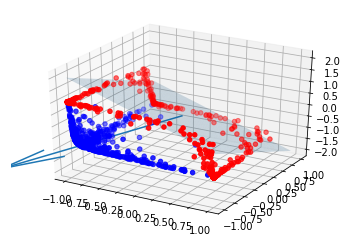

In [5]:
W = np.array([w1, w2, w3])
H = np.tanh(W.dot(X.T)+bias)
x, y = np.meshgrid(np.linspace(-1, 1, n), np.linspace(-1, 1, n))
plane = (1.6*x + 1.6*y) / (-1.6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(H[0,:], H[1,:], H[2,:], c=N*['b']+N*['r'])
ax.quiver([0],[0],[0],[-1.6],[-1.6],[-1.6])
ax.plot_surface(x,y,plane,alpha=0.2)
plt.show()

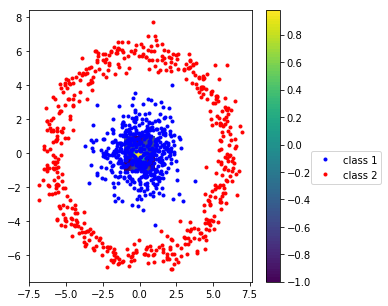

In [6]:
# Adjust w such that most of the points in class 1 gets assigned a positive value,
# while most points in class 2 gets assignmed a negative value
w = np.array([-1.6, -1.6, -1.6])

# Compute output activation
bias = -2.2
hid = np.array([l1.flatten(), l2.flatten(), l3.flatten()])
activation = np.tanh(w.T.dot(hid).reshape(n, n) + bias)

# Plot output activation
fig = plt.figure(figsize=(5, 5)); ax=fig.gca();
ax.plot(x1, y1, 'b.', label='class 1')
ax.plot(x2, y2, 'r.', label='class 2')
cf=ax.contourf(x, y, activation, 100)
ax.legend(bbox_to_anchor=(1.6, 0.5))
fig.colorbar(cf,ax=ax)
plt.show()

### Optional: tensorflow playground
The neural network percented here is very simple, but the principals hold for more complicated network. Try opening [tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.30449&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) where we can play around with number of neurons in our network, activation function ect. Try out the following:
- Can you recreate the network we have just investigated?
- What happens with the decision boundary when we change activation function from $tanh(\cdot)$ to $relu(\cdot)$?
- Try changing the dataset to the spiral. Can you find a network that can classify this data?